In [ ]:
import pandas as pd
df = pd.read_csv('spam_or_not_spam.csv')
df.head()
#print the first 5 rows

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


# Pre-processing

In [ ]:
# data cleaning

def data_cleaning(df):
  # remove Nan rows
  df = df.dropna()
  return df

df= data_cleaning(df)
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
def remove_duplicates(df):
  df = df.drop_duplicates(subset=['email', 'label'])
  return df

df = remove_duplicates(df)
df.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
#pre-processing
import nltk as nl
import re
import string
nl.download('stopwords')
nl.download('wordnet')
nl.download('punkt')
nl.download('punkt_tab')
!pip install contractions
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess(df):
  # convert to lowercase
  df['email'] = df['email'].str.lower()
  #handle words
  df['email'] = df['email'].apply(lambda x: re.sub(r"\b(won)\s+(t)\b", r"\1'\2", x))
  df['email'] = df['email'].apply(lambda x: re.sub(r"\b(can)\s+(t)\b", r"\1'\2", x))
  df['email'] = df['email'].apply(lambda x: re.sub(r"\b(don)\s+(t)\b", r"\1'\2", x))
  #handle contractions
  df['email'] = df['email'].apply(lambda x: contractions.fix(x))
  # clean text : remove punctuation and digits
  df['email'] = df['email'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
  # remove punctuation
  df['email'] = df['email'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
  #remove stopwords
  #stop_words = set(stopwords.words('english'))
  #df['email'] = df['email'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  # tokenize
  #df['email'] = df['email'].apply(lambda x: nl.word_tokenize(x))
  return df

df = preprocess(df)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,email,label
0,date wed number aug number number number numb...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that will not die already the m...,0
4,in adding cream to spaghetti carbonara which ...,0


# Balancing the dataset

<ipython-input-22-932b01a38fce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="inferno")


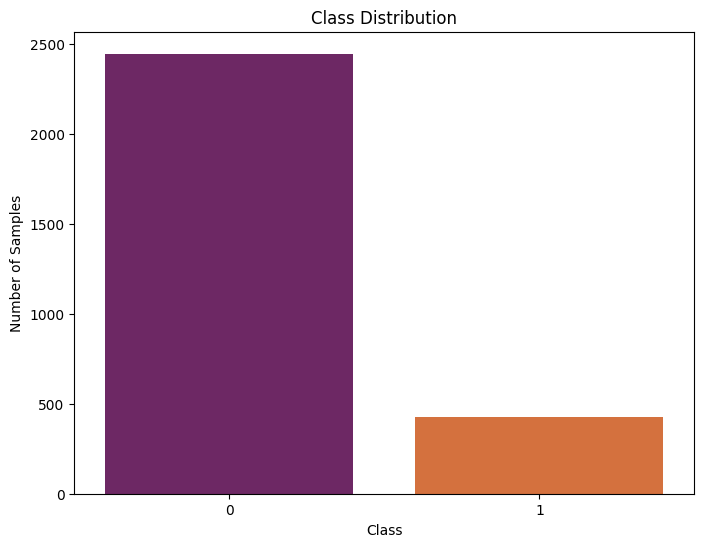

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_class_distribution(y):
    unique, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=unique, y=counts, palette="inferno")
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Number of Samples")
    plt.show()

plot_class_distribution(df['label'])

In [ ]:
#undersampling majority class
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

def undersample_data(X, y):
    rus = RandomUnderSampler(random_state=42)
    # Reshape X to a 2D array with a single column
    X_reshaped = X.values.reshape(-1, 1)
    X_resampled, y_resampled = rus.fit_resample(X_reshaped, y)
    return X_resampled, y_resampled

X = df['email']
y = df['label']
X_resampled, y_resampled = undersample_data(X, y)
df_resampled = pd.DataFrame({'email': X_resampled.flatten(), 'label': y_resampled})

df_resampled.head()

,email,label
0,is there a way to tell spamassassin to put the...,0
1,url url date not supplied some of the words in...,0
2,url url date number number numbertnumber numbe...,0
3,heh ten years ago saying the exact same words ...,0
4,url url date not supplied military communicati...,0


<ipython-input-22-932b01a38fce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=counts, palette="inferno")


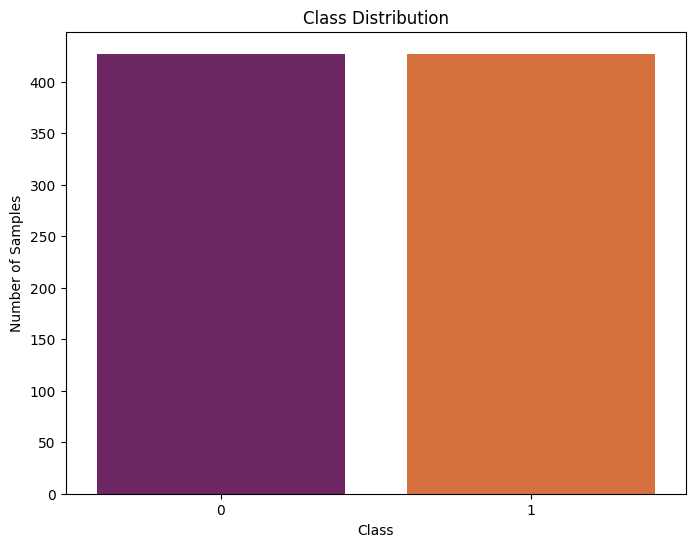

In [ ]:
plot_class_distribution(df_resampled['label'])

# Word2Vec Embeddings

In [ ]:
def create_vocabulary(df, max_token_length=15):
    vocabulary = set()
    for email in df['email']:
        words = word_tokenize(email)
        words = [word for word in words if len(word) <= max_token_length and word.isalpha()]
        vocabulary.update(words)
    return list(vocabulary)

vocabulary = create_vocabulary(df_resampled, max_token_length=15)
vocabulary_size = len(vocabulary)
print(vocabulary)
print(vocabulary_size)

['oregons', 'fact', 'primary', 'pay', 'pgklists', 'overwhelm', 'demeure', 'francisco', 'parting', 'conforming', 'und', 'iah', 'tails', 'cool', 'zeni', 'trouverez', 'colonynew', 'suburban', 'excluding', 'overloaded', 'investing', 'generator', 'loyalty', 'numberur', 'cured', 'seventeen', 'temps', 'sortie', 'citrus', 'groningen', 'moylan', 'stateful', 'wie', 'mis', 'lbreakoutnumber', 'stoned', 'que', 'intoxication', 'kuala', 'town', 'repeating', 'amended', 'memo', 'czknumberjn', 'colums', 'gabber', 'distribute', '就問說', 'hey', 'pharmaceutical', 'prakash', 'frill', 'sigwaitinfo', 'publication', 'yhnumber', 'happened', 'defangmime', 'waiting', 'domains', 'necessarily', 'avenue', 'minmsg', 'broadway', 'eagain', 'confiscation', 'fruits', 'charitable', '근무하기', 'sucked', '경향이', 'journalistic', 'operator', 'bmistjhowioxsx', 'ratak', 'schemenauer', 'lose', 'cpan', 'penile', 'll', 'afknumbermr', 'appealing', 'bullet', 'teaches', '港', 'claws', 'advisory', 'obtained', 'microsloth', 'smsden', 'accompl

In [ ]:
#initialize embeddings
import numpy as np
def initialize_word_embeddings(vocabulary, embedding_size=10, seed=None):
  if seed is not None:
    np.random.seed(seed)

  word_embeddings = {
      word: np.random.uniform(-0.5, 0.5, embedding_size) for word in vocabulary
      }
  return word_embeddings

word_embeddings = initialize_word_embeddings(vocabulary, embedding_size=10, seed=42)
print(word_embeddings)

{'oregons': array([-0.12545988,  0.45071431,  0.23199394,  0.09865848, -0.34398136,
       -0.34400548, -0.44191639,  0.36617615,  0.10111501,  0.20807258]), 'fact': array([-0.47941551,  0.46990985,  0.33244264, -0.28766089, -0.31817503,
       -0.31659549, -0.19575776,  0.02475643, -0.06805498, -0.20877086]), 'primary': array([ 0.11185289, -0.36050614, -0.20785535, -0.13363816, -0.04393002,
        0.28517596, -0.30032622,  0.01423444,  0.09241457, -0.45354959]), 'pay': array([ 0.10754485, -0.32947588, -0.43494841,  0.44888554,  0.46563203,
        0.30839735, -0.19538623, -0.40232789,  0.18423303, -0.05984751]), 'pgklists': array([-0.37796177, -0.00482309, -0.46561148,  0.4093204 , -0.24122002,
        0.16252228, -0.18828892,  0.02006802,  0.04671028, -0.31514554]), 'overwhelm': array([ 0.46958463,  0.27513282,  0.43949894,  0.39482735,  0.09789998,
        0.42187424, -0.4115075 , -0.30401714, -0.45477271, -0.17466967]), 'demeure': array([-0.11132271, -0.22865097,  0.32873751, -0.1

In [ ]:
vocab_dict = {word: idx for idx, word in enumerate(vocabulary)}  # Word to index
vocab_list = list(vocabulary)

embedding_size = 10
embedding_matrix = np.zeros((len(vocabulary), embedding_size))

for word, idx in vocab_dict.items():
    embedding_matrix[idx] = word_embeddings[word]

print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (17138, 10)


## Skip Gram with Negative Sampling

In [ ]:
# Generate training data for Skip-gram with negative sampling
def generate_training_data(df, vocab_dict, window_size):
    training_data = []
    for email in df['email']:
        for i, target_word in enumerate(email):
            if target_word not in vocab_dict:
                continue
            target_idx = vocab_dict[target_word]

            start = max(0, i - window_size)
            end = min(len(email), i + window_size + 1)

            for j in range(start, end):
                if i != j and email[j] in vocab_dict:
                    context_idx = vocab_dict[email[j]]
                    training_data.append((target_idx, context_idx))
    return training_data

positive_pairs = generate_training_data(df_resampled, vocab_dict, window_size=3)
print(positive_pairs[:10])

[(11321, 10222), (11321, 2325), (10222, 11321), (10222, 2325), (10222, 6135), (2325, 11321), (2325, 10222), (2325, 6135), (2325, 14748), (2325, 8851)]


In [ ]:
def create_sampling_table(vocabulary_size, exclude_index=None):
    sampling_prob = np.ones(vocabulary_size)
    if exclude_index is not None:
        sampling_prob[exclude_index] = 0
    sampling_prob /= sampling_prob.sum()
    return sampling_prob

def negative_sampling(vocabulary_size, num_samples, sampling_table):
    return np.random.choice(vocabulary_size, size=num_samples, p=sampling_table)

In [ ]:
def train_embeddings(positive_pairs, word_embeddings, learning_rate, negative_samples, epochs, vocabulary_size):
    sampling_table = create_sampling_table(vocabulary_size)

    for epoch in range(epochs):
        total_loss = 0
        for target_idx, context_idx in positive_pairs:
            # Positive pair
            target_vector = word_embeddings[target_idx]
            context_vector = word_embeddings[context_idx]
            score_pos = np.dot(target_vector, context_vector)
            sigmoid_pos = 1 / (1 + np.exp(-score_pos))
            grad_pos = sigmoid_pos - 1

            # Update embeddings for positive pair
            word_embeddings[target_idx] -= learning_rate * grad_pos * context_vector
            word_embeddings[context_idx] -= learning_rate * grad_pos * target_vector

            total_loss += -np.log(sigmoid_pos)

            # Negative sampling
            negatives = negative_sampling(vocabulary_size, negative_samples, sampling_table)
            negative_vectors = word_embeddings[negatives]

            scores_neg = np.dot(negative_vectors, target_vector)
            sigmoids_neg = 1 / (1 + np.exp(scores_neg))
            grads_neg = sigmoids_neg

            # Update embeddings
            word_embeddings[target_idx] -= learning_rate * np.sum(grads_neg[:, None] * negative_vectors, axis=0)
            word_embeddings[negatives] -= learning_rate * grads_neg[:, None] * target_vector

            total_loss += np.sum(-np.log(1 - sigmoids_neg))

        np.save("trained_embeddings.npy", word_embeddings)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}")

    return word_embeddings

In [ ]:
trained_embeddings = train_embeddings(positive_pairs, embedding_matrix, learning_rate=0.01, negative_samples=5, epochs=3, vocabulary_size=len(vocabulary))
print("Training complete!")

<ipython-input-30-ef3c58f319c7>:32: RuntimeWarning: divide by zero encountered in log
  total_loss += np.sum(-np.log(1 - sigmoids_neg))
<ipython-input-30-ef3c58f319c7>:25: RuntimeWarning: overflow encountered in exp
  sigmoids_neg = 1 / (1 + np.exp(scores_neg))
<ipython-input-30-ef3c58f319c7>:11: RuntimeWarning: overflow encountered in exp
  sigmoid_pos = 1 / (1 + np.exp(-score_pos))
<ipython-input-30-ef3c58f319c7>:18: RuntimeWarning: divide by zero encountered in log
  total_loss += -np.log(sigmoid_pos)


Epoch 1/3, Loss: inf


<ipython-input-30-ef3c58f319c7>:29: RuntimeWarning: overflow encountered in subtract
  word_embeddings[target_idx] -= learning_rate * np.sum(grads_neg[:, None] * negative_vectors, axis=0)
<ipython-input-30-ef3c58f319c7>:30: RuntimeWarning: invalid value encountered in multiply
  word_embeddings[negatives] -= learning_rate * grads_neg[:, None] * target_vector
<ipython-input-30-ef3c58f319c7>:16: RuntimeWarning: invalid value encountered in multiply
  word_embeddings[context_idx] -= learning_rate * grad_pos * target_vector


Epoch 2/3, Loss: nan
Epoch 3/3, Loss: nan
Training complete!


In [ ]:
df_resampled['email'] = df_resampled['email'].apply(lambda x: word_tokenize(x))

In [ ]:
from gensim.models import Word2Vec

tokenized_corpus = df_resampled['email']
word2vec_model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=10,
    window=5,
    min_count=1,
    sg=1,
    workers=4,
    epochs=10
)

word2vec_model.save("word2vec_spam_model.model")

In [ ]:
import numpy as np

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    magnitude = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    if magnitude == 0:  # Avoid division by zero
        return 0
    return dot_product / magnitude

word1 = "email"
word2 = "message"

similarity = cosine_similarity(word2vec_model.wv[word1], word2vec_model.wv[word2])
print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")

Cosine similarity between 'email' and 'message': 0.8934
